#開始

In [8]:
import csv
import pandas as pd
import os
import glob
encoding = 'SHIFT_JIS'
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
#files = glob.glob('/content/*.csv')
files = os.listdir('/content')
for file in files:
  print(file)

.config
240924-500rpm.csv
240930-1.csv
sample_data


# データ変更

In [36]:
file_name = "240930-2-dev.csv" # @param {type:"string"}
t = 0.733 # @param {type:"number"}
w = 0.4152 # @param {type:"number"}
x = 0.05 # @param {type:"number"}

df = pd.read_csv("/content/"+file_name, encoding=encoding, skiprows=15)#
df = df.drop(df.columns[[0, -1]], axis=1)
df = df - t

#m = df.median().median()#df[(df>=m-w)&(df<=m+w)] = m
#df.to_csv(file_name+'(z).csv', index=False)

差分

240930-2-dev.csv.png


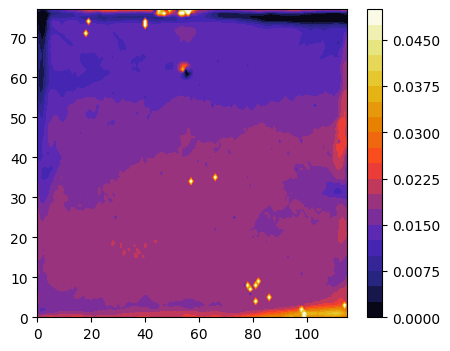

In [54]:
#df[(df>=m+x)] = m+x
#df[(df<=m-x)] = m-x#
#df.iloc[0,0] = m+x
#df.iloc[1,0] = m-x

cmap = plt.get_cmap('CMRmap')
plt.figure(figsize=(5, 4))
plt.contourf( df.values,cmap=cmap,levels=20)
plt.colorbar() #plt.axis('scaled')
print(file_name+".png")
plt.show()

In [49]:
file_name = "240930-2.csv" # @param {type:"string"}
df = pd.read_csv("/content/"+file_name, encoding=encoding, skiprows=15)#
df = df.drop(df.columns[[0, -1]], axis=1)

file_name = "240930-2-dev.csv" # @param {type:"string"}
t = 0.733 # @param {type:"number"}
x = 0.05 # @param {type:"number"}
dfb=df
df = pd.read_csv("/content/"+file_name, encoding=encoding, skiprows=15)#
df = df.drop(df.columns[[0, -1]], axis=1)
df=dfb-df+t
df[(df>x)] = x
df[(df<0)] = 0

In [5]:
print(df.iloc[60,40])
print(m)

0.10461
0.106765


## 収率

In [ ]:
df = df.iloc[8:75, 10:110]
#df = df.iloc[:, :-11]
#pall = df[(df>=m-w)&(df<=m+w)].count().sum()   /df.size#pinn = df.iloc[9:120,9:120][(df>=m-w)&(df<=m+w)].count().sum() /df.iloc[9:120, 9:120].size#pinn = df.iloc[4:60,9:120][(df>=m-w)&(df<=m+w)].count().sum() /df.iloc[4:60,9:120].size
##
pall = df.iloc[4:126,9:120][(df>=m-w)&(df<=m+w)].count().sum() /df.iloc[4:126,9:120].size
#pall = df.iloc[2:63,9:120][(df>=m-w)&(df<=m+w)].count().sum() /df.iloc[2:63,9:120].size
##
pinn = df.iloc[9:120,20:105][(df>=m-w)&(df<=m+w)].count().sum() /df.iloc[9:120,20:105].size
#pinn = df.iloc[4:60,19:110][(df>=m-w)&(df<=m+w)].count().sum() /df.iloc[4:60,19:110].size
##pall =round(pall*100,1)pinn =round(pinn*100,1)
#df.iloc[2:63,9:120]=m-x
#df.iloc[4:60,19:110]=m+x
###
##pall = df.iloc[4:126,9:120][(df>=m-w)&(df<=m+w)].count().sum() /df.iloc[4:126,9:120].size
#pinn = df.iloc[9:120,20:105][(df>=m-w)&(df<=m+w)].count().sum() /df.iloc[9:120,20:105].size
##pall =round(pall*100,1)
##pinn =round(pinn*100,1)
#plt.title(str(pall)+" %", loc='right', color='darkgreen')
#plt.title(str(pinn)+" %", loc='center', color='black')

In [ ]:
fig, ax = plt.subplots()
norm = mcolors.Normalize(vmin=m-x, vmax=m+x)#(vmin=df.min().min(), vmax=df.max().max())
df[(df>=m-w)&(df<=m+w)] = m
im = ax.imshow(df, cmap=cmap, norm=norm)
ax.set_xticks(np.arange(0, 131, step=10))
ax.set_yticks(np.arange(0, 131, step=10))

for i in range(0, 14, 1):
    plt.plot([(130-114)/2+i*114/13, (130-114)/2+i*114/13], [(130-122)/2, (130+122)/2], color='darkgreen', linewidth=1)
for j in range(0, 21, 1):
    plt.plot([(130-114)/2, (130+114)/2],[(130-122)/2+j*122/20, (130-122)/2+j*122/20], color='darkgreen', linewidth=1)
for i in range(1, 12, 1):
    plt.plot([(130-114)/2+i*114/13, (130-114)/2+i*114/13], [(130-110)/2, (130+110)/2], color='black', linewidth=2)
for j in range(1, 20, 1):
    plt.plot([(130-95)/2, 104],[(130-122)/2+j*122/20, (130-122)/2+j*122/20], color='black', linewidth=2)

ax.set_title(str(round(m*1000,1))+"µ", loc='left') #makuatsu
ax.set_title(str(pall)+"% 130□", loc='right')
ax.set_title(str(pinn)+"% 110□", loc='center')
fig.colorbar(im)
plt.show()

In [ ]:
fig, ax = plt.subplots()
cmap = plt.get_cmap('bwr')
norm = mcolors.Normalize(vmin=m-x, vmax=m+x)#(vmin=df.min().min(), vmax=df.max().max())
df[(df>=m-w)&(df<=m+w)] = m
im = ax.imshow(df, cmap=cmap, norm=norm)
ax.set_title(str(pall)+" %", loc='right', color='darkgreen')
ax.set_title(str(pinn)+" %", loc='center', color='black')
print(file_name+".png")
plt.show()

In [ ]:
df[(df>=m-w)&(df<=m+w)] = m
#df.iloc[23:41, 41:59] = m
norm = mcolors.Normalize(vmin=m-x, vmax=m+x)#(vmin=df.min().min(), vmax=df.max().max())
cmap = plt.get_cmap('bwr')
fig, ax = plt.subplots()
im = ax.imshow(df, cmap=cmap, norm=norm)

ax.set_xticks(np.arange(0, 131, step=10))
ax.set_yticks(np.arange(0, 131, step=10))
ax.set_title(str(round(m*1000,1))+"µ", loc='left') #makuatsu
ax.set_title(str(pall)+"% 130□", loc='right')
ax.set_title(str(pinn)+"% 110□", loc='center')
#ax.grid()
#ax.set_ylim(10, 140)#ax.set_xlim(-65,65)
print(file_name+".png")
#fig.colorbar(im)
plt.show()#

等高線

In [ ]:
fig, ax = plt.subplots()

norm = mcolors.Normalize(vmin=m-x, vmax=m+x)
cmap = plt.get_cmap('bwr')
im = ax.imshow(df, cmap=cmap, norm=norm)
#plt.figure(figsize=(5, 4))
#ax.set_xticks(np.arange(0, 131, step=10))
#ax.set_yticks(np.arange(0, 131, step=10))
for i in range(0, 14, 13):
    plt.plot([(130-114)/2+i*114/13, (130-114)/2+i*114/13], [(130-122)/2, (130+122)/2],linestyle = "--", color='darkgreen', linewidth=2)
for j in range(0, 21, 20):
    plt.plot([(130-114)/2, (130+114)/2],[(130-122)/2+j*122/20, (130-122)/2+j*122/20],linestyle = "--", color='darkgreen', linewidth=2)
for i in range(1, 12, 10):
    plt.plot([(130-114)/2+i*114/13, (130-114)/2+i*114/13], [(130-110)/2, (130+110)/2],linestyle = "--", color='black', linewidth=2)
for j in range(1, 20, 18):
    plt.plot([(130-95)/2, 104],[(130-122)/2+j*122/20, (130-122)/2+j*122/20],linestyle = "--", color='black', linewidth=2)

plt.show()

In [ ]:
plt.hist(df.values.flatten(), bins=50,)#range=(0.02,0.18))
plt.show()
print(df.min().min(),df.max().max())

In [ ]:
cmap = plt.get_cmap('RdPu')
plt.figure(figsize=(5, 130))
fig, ax = plt.subplots()
im = ax.imshow(df, cmap=cmap,norm=norm)
fig.colorbar(im)
plt.show()#

In [46]:
df.to_csv(file_name+'(z).csv', index=False)
#fig.savefig("img.png",transparent=True)